In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import yfinance as yf
# 設定資產清單
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# 獲取多資產的歷史數據
data = yf.download(assets, start='2020-01-01', end='2024-01-01')['Close']

# 計算日收益率
returns = data.pct_change().dropna()

# 顯示數據
print(returns.head())


[*********************100%***********************]  5 of 5 completed

Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2020-01-03 -0.009722 -0.012139 -0.005231 -0.012452  0.029633
2020-01-06  0.007968  0.014886  0.026654  0.002585  0.019255
2020-01-07 -0.004703  0.002092 -0.001932 -0.009118  0.038801
2020-01-08  0.016086 -0.007809  0.007118  0.015928  0.049205
2020-01-09  0.021241  0.004799  0.010498  0.012493 -0.021945


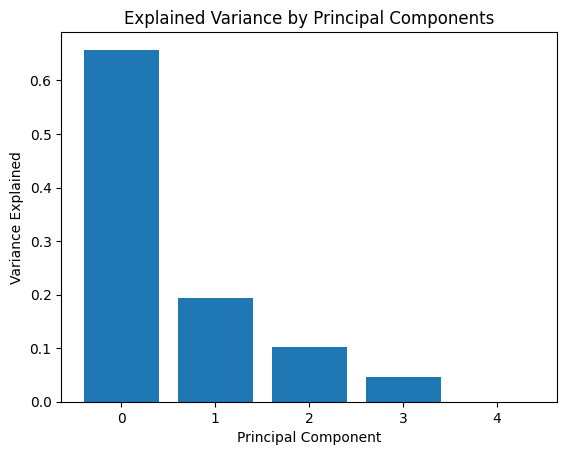

In [2]:
# 計算相關性矩陣
correlation_matrix = returns.corr()

# 應用 PCA
pca = PCA()
pca.fit(correlation_matrix)

# 提取主成分
explained_variance = pca.explained_variance_ratio_
principal_components = pca.components_

# 可視化主成分的貢獻
plt.bar(range(len(explained_variance)), explained_variance)
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()


In [3]:
# 根據主成分調整資產權重
num_components = 2  # 使用前兩個主成分
reduced_data = pca.transform(correlation_matrix)[:, :num_components]

# 計算新權重
weights = np.abs(reduced_data.sum(axis=1))
weights = weights / weights.sum()

# 顯示新權重
portfolio_weights = pd.Series(weights, index=assets)
print(portfolio_weights)


AAPL     0.176861
MSFT     0.137603
GOOGL    0.137915
AMZN     0.185224
TSLA     0.362397
dtype: float64
